<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏡</h1></center>

* **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass**: The building class
* **MSZoning**: The general zoning classification
* **LotFrontage**: Linear feet of street connected to property
* **LotArea**: Lot size in square feet
* **Street**: Type of road access
* **Alley**: Type of alley access
* **LotShape**: General shape of property
* **LandContour**: Flatness of the property
* **Utilities**: Type of utilities available
* **LotConfig**: Lot configuration
* **LandSlope**: Slope of property
* **Neighborhood**: Physical locations within Ames city limits
* **Condition1**: Proximity to main road or railroad
* **Condition2**: Proximity to main road or railroad (if a second is present)
* **BldgType**: Type of dwelling
* **HouseStyle**: Style of dwelling
* **OverallQual**: Overall material and finish quality
* **OverallCond**: Overall condition rating
* **YearBuilt**: Original construction date
* **YearRemodAdd**: Remodel date
* **RoofStyle**: Type of roof
* **RoofMatl**: Roof material
* **Exterior1st**: Exterior covering on house
* **Exterior2nd**: Exterior covering on house (if more than one material)
* **MasVnrType**: Masonry veneer type
* **MasVnrArea**: Masonry veneer area in square feet
* **ExterQual**: Exterior material quality
* **ExterCond**: Present condition of the material on the exterior
* **Foundation**: Type of foundation
* **BsmtQual**: Height of the basement
* **BsmtCond**: General condition of the basement
* **BsmtExposure**: Walkout or garden level basement walls
* **BsmtFinType1**: Quality of basement finished area
* **BsmtFinSF1**: Type 1 finished square feet
* **BsmtFinType2**: Quality of second finished area (if present)
* **BsmtFinSF2**: Type 2 finished square feet
* **BsmtUnfSF**: Unfinished square feet of basement area
* **TotalBsmtSF**: Total square feet of basement area
* **Heating**: Type of heating
* **HeatingQC**: Heating quality and condition
* **CentralAir**: Central air conditioning
* **Electrical**: Electrical system
* **1stFlrSF**: First Floor square feet
* **2ndFlrSF**: Second floor square feet
* **LowQualFinSF**: Low quality finished square feet (all floors)
* **GrLivArea**: Above grade (ground) living area square feet
* **BsmtFullBath**: Basement full bathrooms
* **BsmtHalfBath**: Basement half bathrooms
* **FullBath**: Full bathrooms above grade
* **HalfBath**: Half baths above grade
* **Bedroom**: Number of bedrooms above basement level
* **Kitchen**: Number of kitchens
* **KitchenQual**: Kitchen quality
* **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
* **Functional**: Home functionality rating
* **Fireplaces**: Number of fireplaces
* **FireplaceQu**: Fireplace quality
* **GarageType**: Garage location
* **GarageYrBlt**: Year garage was built
* **GarageFinish**: Interior finish of the garage
* **GarageCars**: Size of garage in car capacity
* **GarageArea**: Size of garage in square feet
* **GarageQual**: Garage quality
* **GarageCond**: Garage condition
* **PavedDrive**: Paved driveway
* **WoodDeckSF**: Wood deck area in square feet
* **OpenPorchSF**: Open porch area in square feet
* **EnclosedPorch**: Enclosed porch area in square feet
* **3SsnPorch**: Three season porch area in square feet
* **ScreenPorch**: Screen porch area in square feet
* **PoolArea**: Pool area in square feet
* **PoolQC**: Pool quality
* **Fence**: Fence quality
* **MiscFeature**: Miscellaneous feature not covered in other categories
* **MiscVal**: Value of miscellaneous feature
* **MoSold**: Month Sold
* **YrSold**: Year Sold
* **SaleType**: Type of sale
* **SaleCondition**: Condition of sale

Importing the Essential Libraries, Metrics

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [62]:
df = pd.read_csv(r"C:\Users\P PAVAN REDDY\Downloads\House Price Prediction\train.csv")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Features with missing values

In [64]:
list(df.isna().mean()[df.isna().mean()>0.0].index)

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [65]:
list(df.isna().mean()[df.isna().mean()>0.0].index)

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [66]:
#percentage of missimg values in different features

null_percentage = df.isna().mean()[df.isna().mean()>0.0].sort_values(ascending=False) * 100
null_percentage

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Drop features with null values more than 50% 

In [67]:
df_copy = df.copy()

In [68]:
list(null_percentage[null_percentage > 50].index)

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [69]:
df_copy.drop(list(null_percentage[null_percentage > 50].index), axis=1, inplace=True)

In [70]:
df_copy.isna().mean()[df_copy.isna().mean()>0.0].sort_values(ascending=False) * 100

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

## Imputing with mode(most frequent value) for categorical variables

In [71]:
cat_null_features = list(df_copy[list(null_percentage[null_percentage < 10].index)].dtypes[df_copy[list(null_percentage[null_percentage < 10].index)].dtypes == 'object'].index)
cat_null_features #categorical features with null values 

['GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'Electrical']

In [72]:
impute_mode = SimpleImputer(strategy='most_frequent')

In [73]:
df_copy['GarageCond'].shape

(1460,)

In [74]:
for col in cat_null_features:
    
    df_copy[col + '_imputed'] = impute_mode.fit_transform(df_copy[[col]])

In [75]:
for col in cat_null_features:
    
    print(df_copy[col].value_counts())
    print(df_copy[col + '_imputed'].value_counts(), '\n\n')

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType_imputed, dtype: int64 


Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
Unf    686
RFn    422
Fin    352
Name: GarageFinish_imputed, dtype: int64 


TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual_imputed, dtype: int64 


TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond_imputed, dtype: int64 


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure_imputed, dtype: int64 


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: Bsm

* let's store data in imputed columns in to original columns

In [76]:
for col in cat_null_features:
    
    df_copy[col] = df_copy[col + '_imputed']
    df_copy.drop([col + '_imputed'], axis=1, inplace=True)

In [77]:
df_copy.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

## Random Imputation

In [78]:
continuous_null_features = list(df_copy[list(null_percentage[null_percentage < 10].index)].dtypes[df_copy[list(null_percentage[null_percentage < 10].index)].dtypes != 'object'].index)
continuous_null_features #continuous features with null values

['GarageYrBlt', 'MasVnrArea']

In [79]:
for col in continuous_null_features:
    
    df_copy[col + '_imputed'] = df_copy[col]
    df_copy[col + '_imputed'][df_copy[col + '_imputed'].isna()] = df_copy[col + '_imputed'].dropna().sample(df_copy[col + '_imputed'].isna().sum(), random_state=0).values

In [80]:
df_copy.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

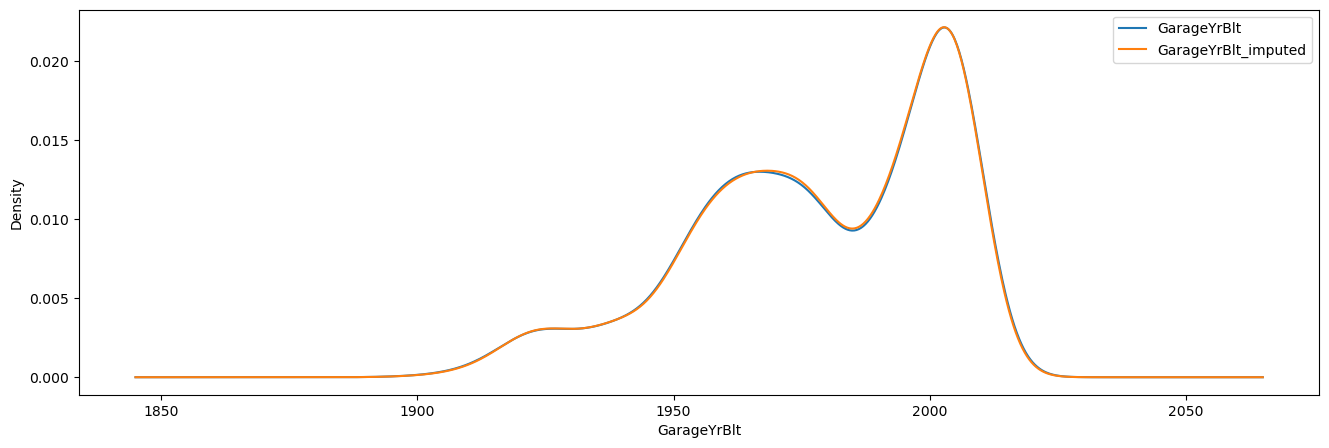

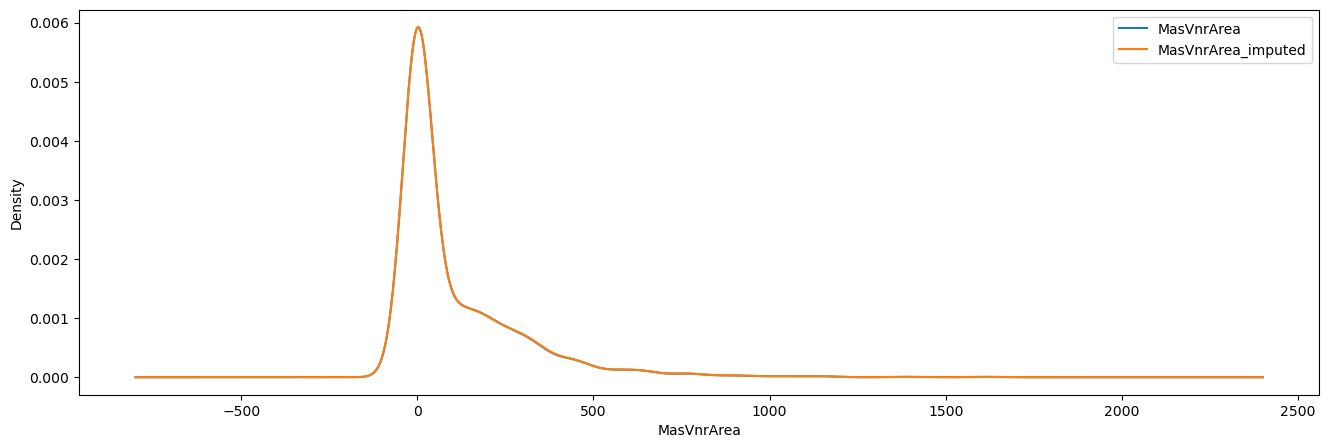

In [81]:
for col in continuous_null_features:
    
    plt.figure(figsize=(16,5))
    df_copy[col].plot(kind='kde', label=col)
    df_copy[col + '_imputed'].plot(kind='kde', label=col + '_imputed')
    plt.xlabel(col)
    plt.legend()

* distibutions after imputations are almost same

* let's store data in imputed columns in to original columns

In [82]:
for col in continuous_null_features:
    
    df_copy[col] = df_copy[col + '_imputed']
    df_copy.drop([col + '_imputed'], axis=1, inplace=True)

## Arbritary value imputation

In [83]:
df_copy.isna().mean()[df_copy.isna().mean()>0.0] * 100

LotFrontage    17.739726
FireplaceQu    47.260274
dtype: float64

In [84]:
df_copy[df_copy.isna().mean()[df_copy.isna().mean()>0.0].index].dtypes

LotFrontage    float64
FireplaceQu     object
dtype: object

LotFrontage

In [85]:
impute_const = SimpleImputer(strategy='constant', fill_value=-100)

In [86]:
df_copy['LotFrontage_imputed'] = impute_const.fit_transform(df_copy[['LotFrontage']])

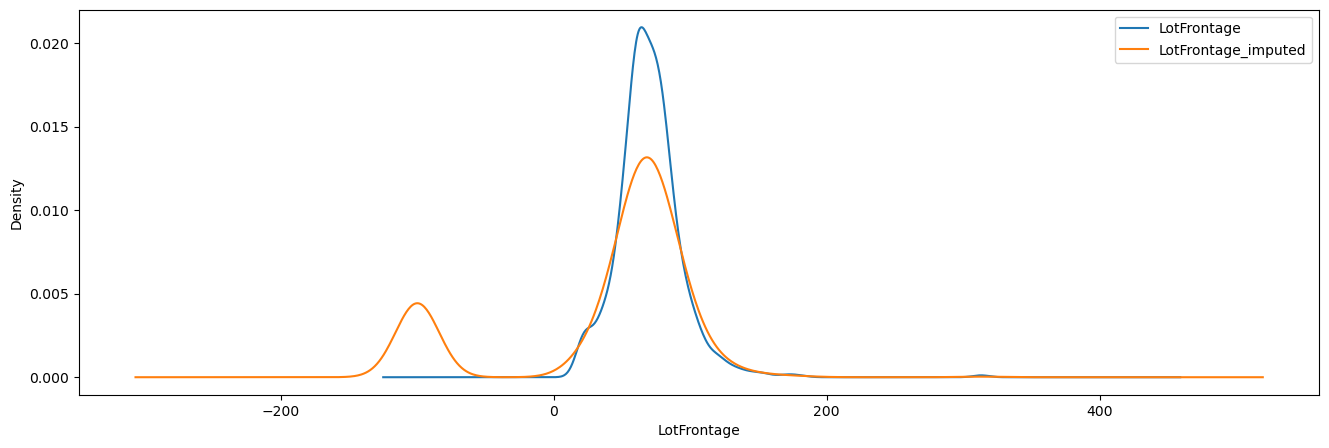

In [87]:
for col in ['LotFrontage']:
    
    plt.figure(figsize=(16,5))
    df_copy[col].plot(kind='kde', label=col)
    df_copy[col + '_imputed'].plot(kind='kde', label=col + '_imputed')
    plt.xlabel(col)
    plt.legend()

In [88]:
df_copy[['LotFrontage', 'LotFrontage_imputed']].describe()

,LotFrontage,LotFrontage_imputed
count,1201.000000,1460.000000
mean,70.049958,39.883562
std,24.284752,68.612920
min,21.000000,-100.000000
25%,59.000000,42.000000
50%,69.000000,63.000000
75%,80.000000,79.000000
max,313.000000,313.000000


* we can see a rise in density of LotFrontage_imputed at -100 which indicates the value is very different from others(missing).

In [89]:
for col in ['LotFrontage']:
    
    df_copy[col] = df_copy[col + '_imputed']
    df_copy.drop([col + '_imputed'], axis=1, inplace=True)

FireplaceQu

In [90]:
impute_const = SimpleImputer(strategy='constant', fill_value='missing')

In [91]:
df_copy['FireplaceQu_imputed'] = impute_const.fit_transform(df_copy[['FireplaceQu']])

In [92]:
df_copy['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [93]:
df_copy['FireplaceQu_imputed'].value_counts()

missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: FireplaceQu_imputed, dtype: int64

* imputed nulls in  FireplaceQu with 'missing' category 

* let's store data in imputed columns in to original columns

In [94]:
for col in ['FireplaceQu']:
    
    df_copy[col] = df_copy[col + '_imputed']
    df_copy.drop([col + '_imputed'], axis=1, inplace=True)

In [95]:
print("Missing Values by Column")
print("-"*30)
print(df_copy.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df_copy.isna().sum().sum())

Missing Values by Column
------------------------------
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [96]:
data = df_copy.copy()

## Model Building

Splitting the data into X and y chunks

In [97]:
X = data.drop(["SalePrice",'LotFrontage', 'FireplaceQu'], axis=1)
y = data["SalePrice"]

One hot encoding

In [98]:
cat_cols = data.dtypes[data.dtypes == 'object'].index
cat_cols = X.dtypes[X.dtypes == 'object'].index

In [99]:
X = pd.get_dummies(X, columns=cat_cols)

In [100]:
X.shape

(1460, 270)

standardizing

In [101]:
num_cols = data.dtypes[data.dtypes != 'object'].index
num_cols = [ elem for elem in num_cols if elem != 'LotFrontage']
input_num_cols = num_cols[:-1]

In [102]:
scaler = StandardScaler()
X[input_num_cols] = scaler.fit_transform(X[input_num_cols])

In [103]:
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.508901,0.575425,-0.288653,...,0,0,0,1,0,0,0,0,1,0
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574295,1.171992,-0.288653,...,0,0,0,1,0,0,0,0,1,0
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.320999,0.092907,-0.288653,...,0,0,0,1,0,0,0,0,1,0
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574295,-0.499274,-0.288653,...,0,0,0,1,1,0,0,0,0,0
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.359983,0.463568,-0.288653,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574295,-0.973018,-0.288653,...,0,0,0,1,0,0,0,0,1,0
1456,1.723747,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.151865,0.083359,0.759659,0.722112,...,0,0,0,1,0,0,0,0,1,0
1457,1.726120,0.309859,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574295,-0.369871,-0.288653,...,0,0,0,1,0,0,0,0,1,0
1458,1.728492,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574295,-0.865548,6.092188,...,0,0,0,1,0,0,0,0,1,0


Train Test Split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
X_train.shape, X_test.shape

((1168, 270), (292, 270))

***Defining some evaluation functions for convenience***

In [106]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

Machine Learning Models

In [107]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [108]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 12918471663032.531
MSE: 2.646360134052042e+28
RMSE: 162676369951263.72
R2 Score: -3.4501272339270164e+18
------------------------------
RMSE Cross-Validation: 387106810846436.8


In [109]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17051.05809625048
MSE: 1142458335.2562203
RMSE: 33800.27123051264
R2 Score: 0.8510547916220652
------------------------------


RMSE Cross-Validation: 30532.384352028148


In [110]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17410.583150684928
MSE: 809513207.5199945
RMSE: 28451.94558408958
R2 Score: 0.8944616975010167
------------------------------
RMSE Cross-Validation: 29496.194452982214


In [111]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 21974.424322904484
MSE: 1084577432.769639
RMSE: 32932.92323450257
R2 Score: 0.8586008725739218
------------------------------
RMSE Cross-Validation: 387106810846436.8


In [112]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
2,RandomForestRegressor,1.741058e+04,8.095132e+08,2.845195e+04,8.944617e-01,2.949619e+04
1,SVR,1.705106e+04,1.142458e+09,3.380027e+04,8.510548e-01,3.053238e+04
0,LinearRegression,1.291847e+13,2.646360e+28,1.626764e+14,-3.450127e+18,3.871068e+14
3,Polynomial Regression (degree=2),2.197442e+04,1.084577e+09,3.293292e+04,8.586009e-01,3.871068e+14
